#### Tugas Kecil 1
#### Eksplorasi Library Algoritme Pembelajaran pada Jupyter Notebook

#### Anggota Kelompok:
1. 13519210 Dwi Kalam Amal Tauhid
2. 13520125 Ikmal Alfaozi

### 1. Membaca dataset (load dataset)

In [61]:
from sklearn import datasets
import pandas as pd

bc = datasets.load_breast_cancer()
df_bc = pd.DataFrame(bc.data, columns = bc.feature_names)
df_bc["target"] = bc.target

x_bc = df_bc.iloc[:, :-1]
y_bc = df_bc["target"]

In [62]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [63]:
from sklearn.model_selection import train_test_split

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(
    x_bc, 
    y_bc, 
    test_size = 0.2, 
    random_state = 568
)

### 2. Melakukan Pembelajaran
### 3. Simpan Model Hasil Pembelajaran
### 4. Proses Prediksi

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_fit_model(model, x_train, y_train):
    return model.fit(x_train, y_train)

def get_y_pred(fit_model, x_test):
    y_pred = fit_model.predict(x_test)
    return y_pred

def get_all_metrics_score(y_test, y_pred):
    return [
        accuracy_score(y_test, y_pred), 
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

def get_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [65]:
import pickle

def save_model(model, dest_path):
    # pkl extension
    pickle.dump(model, open(dest_path, 'wb'))
    
def load_model(src_path):
    # pkl extension
    return pickle.load(open(src_path, 'rb'))

#### A. DecisionTreeClassifier

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import export_text

dt = tree.DecisionTreeClassifier(criterion = "entropy", max_features = "sqrt", random_state = 40)
dt_fit = get_fit_model(dt, x_train_bc, y_train_bc)
save_model(dt_fit, "./model/dt_fit.pkl")

In [67]:
dt_fit = load_model("./model/dt_fit.pkl")
y_pred = get_y_pred(dt_fit, x_test_bc)
y_pred = dt_fit.predict(x_test_bc)

dt_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
dt_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{dt_bc_scores}\n")
print(f"{dt_bc_confusion_mat}\n")
print(export_text(dt))

[0.9122807017543859, 0.9104477611940298, 0.9384615384615385, 0.9242424242424243]

[[43  6]
 [ 4 61]]

|--- feature_13 <= 30.83
|   |--- feature_21 <= 25.83
|   |   |--- feature_23 <= 989.45
|   |   |   |--- feature_25 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_25 >  0.50
|   |   |   |   |--- feature_20 <= 15.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_20 >  15.45
|   |   |   |   |   |--- class: 0
|   |   |--- feature_23 >  989.45
|   |   |   |--- class: 0
|   |--- feature_21 >  25.83
|   |   |--- feature_25 <= 0.35
|   |   |   |--- feature_7 <= 0.05
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_22 <= 113.95
|   |   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |   |--- feature_23 <= 643.25
|   |   |   |   |   |   |   |   |--- class: 1
| 

#### B. Id3Estimator

In [68]:
# Id3Estimator
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

id3_estimator = Id3Estimator(prune = True, gain_ratio = True)
id3_estimator_fit = get_fit_model(id3_estimator, x_train_bc, y_train_bc)
save_model(id3_estimator_fit, "./model/id3_estimator_fit.pkl")

In [69]:
id3_estimator_fit = load_model("./model/id3_estimator_fit.pkl")
y_pred = get_y_pred(id3_estimator_fit, x_test_bc)

id3_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
id3_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{id3_bc_scores}\n")
print(f"{id3_bc_confusion_mat}\n")

[0.9122807017543859, 0.8985507246376812, 0.9538461538461539, 0.9253731343283582]

[[42  7]
 [ 3 62]]



#### C. K Means

In [93]:
# K Means
from sklearn.cluster import KMeans

k_means = KMeans(n_init = "auto", n_clusters = 2, max_iter = 5000, random_state = 15)
k_means_fit = get_fit_model(k_means, x_train_bc, y_train_bc)
save_model(k_means_fit, "./model/k_means_fit.pkl")

In [95]:
k_means_fit = load_model("./model/k_means_fit.pkl")
y_pred = get_y_pred(k_means_fit, x_test_bc)

k_means_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
k_means_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{k_means_bc_scores}\n")
print(f"{k_means_bc_confusion_mat}\n")

[0.8421052631578947, 0.7831325301204819, 1.0, 0.8783783783783784]

[[31 18]
 [ 0 65]]



#### D. LogisticRegression

In [72]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 50000)
log_reg_fit = get_fit_model(log_reg, x_train_bc, y_train_bc)
save_model(log_reg_fit, "./model/log_reg_fit.pkl")

In [73]:
log_reg_fit = load_model("./model/log_reg_fit.pkl")
y_pred = get_y_pred(log_reg_fit, x_test_bc)

log_reg_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
log_reg_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{log_reg_bc_scores}\n")
print(f"{log_reg_bc_confusion_mat}\n")

[0.9736842105263158, 0.9696969696969697, 0.9846153846153847, 0.9770992366412214]

[[47  2]
 [ 1 64]]



#### E. Neural_network

In [74]:
# Neural_network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 50000, solver = "lbfgs")
mlp_fit = get_fit_model(mlp, x_train_bc, y_train_bc)
save_model(mlp_fit, "./model/mlp_fit.pkl")

In [75]:
mlp_fit = load_model("./model/mlp_fit.pkl")
y_pred = get_y_pred(mlp_fit, x_test_bc)

mlp_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
mlp_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{mlp_bc_scores}\n")
print(f"{mlp_bc_confusion_mat}\n")

[0.9473684210526315, 0.9682539682539683, 0.9384615384615385, 0.953125]

[[47  2]
 [ 4 61]]



#### F. SVM

In [76]:
# SVM

from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc_fit = get_fit_model(svc, x_train_bc, y_train_bc)
save_model(svc_fit, "./model/svc_fit.pkl")

In [77]:
svc_fit = load_model("./model/svc_fit.pkl")
y_pred = get_y_pred(svc_fit, x_test_bc)

svc_bc_scores = get_all_metrics_score(y_test_bc, y_pred)
svc_bc_confusion_mat = get_confusion_matrix(y_test_bc, y_pred)

print(f"{svc_bc_scores}\n")
print(f"{svc_bc_confusion_mat}\n")

[0.9649122807017544, 0.9552238805970149, 0.9846153846153847, 0.9696969696969696]

[[46  3]
 [ 1 64]]



#### Metrix Evaluasi

In [78]:
index = [
    "DecisionTree",
    "ID3",
    "K Means",
    "LogisticRegression",
    "Neural_network",
    "SVM"
]
columns = [
    "Accuracy", 
    "Precision", 
    "Recall", 
    "F1"
]

bc_algos_scores = [
    dt_bc_scores,
    id3_bc_scores,
    k_means_bc_scores,
    log_reg_bc_scores,
    mlp_bc_scores,
    svc_bc_scores
]

bc_algos_metrics_score = pd.DataFrame(
    data = bc_algos_scores, 
    index = index, 
    columns = [["Breast Cancer" for i in range(len(columns))], columns])

### 5. Analisis hasil metrik evaluasi

In [79]:
bc_algos_metrics_score

Breast Cancer                              
                        Accuracy Precision    Recall        F1
DecisionTree            0.912281  0.910448  0.938462  0.924242
ID3                     0.912281  0.898551  0.953846  0.925373
K Means                 0.842105  0.783133  1.000000  0.878378
LogisticRegression      0.973684  0.969697  0.984615  0.977099
Neural_network          0.947368  0.968254  0.938462  0.953125
SVM                     0.964912  0.955224  0.984615  0.969697

<Axes: >

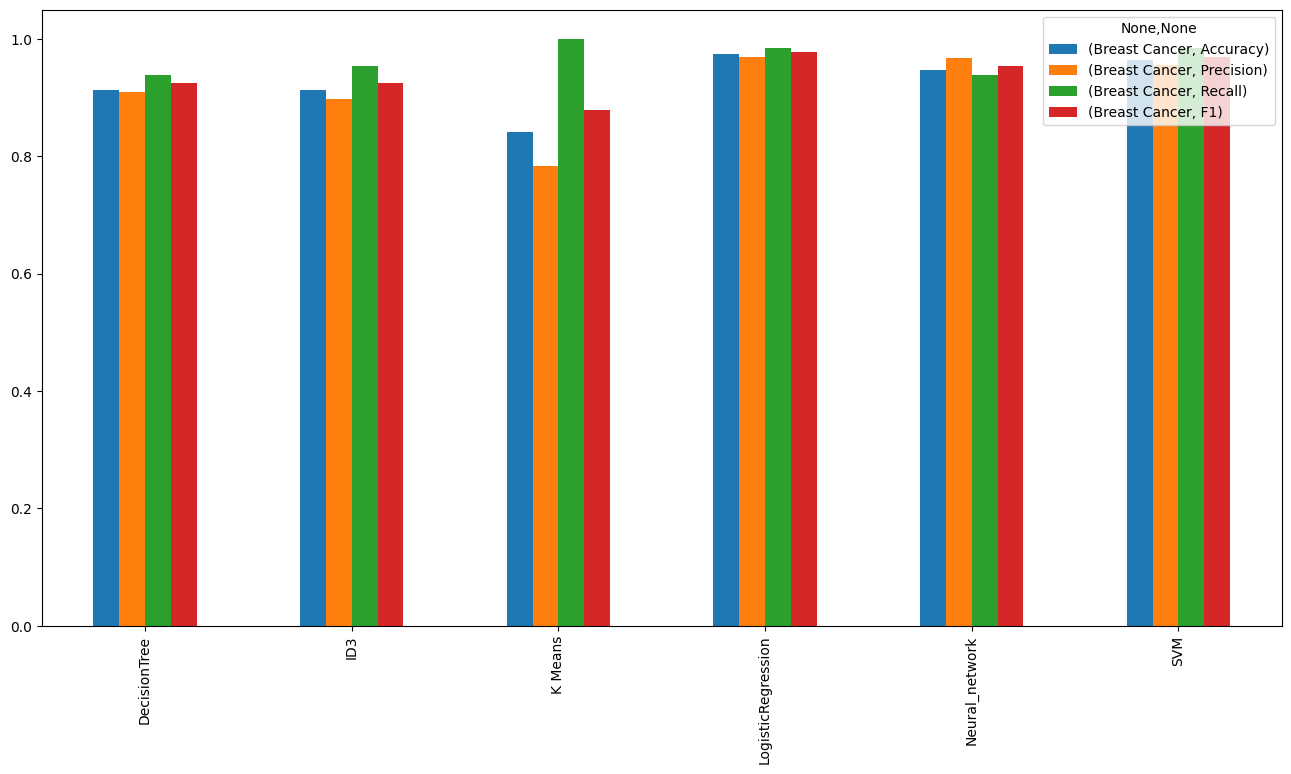

In [80]:
import matplotlib.pyplot as plt

x = 2

bc_algos_metrics_score.plot.bar(stacked=False, figsize=(16,8))

Data evaluasi hasil prediksi tiap metrics untuk setiap algoritma (sebagai bentuk perbandingan nilai) dapat dilihat pada tabel `bc_algos_metrics_score` atau gambar di atas. Secara umum, model-model dari algoritma telah dilakukan tuning untuk menghasilkan hasil prediksi yang lebih baik.

id3_estimator = Id3Estimator(prune = True, gain_ratio = True)
k_means = KMeans(n_init = "auto", n_clusters = 2, max_iter = 5000, random_state = 15)
log_reg = LogisticRegression(max_iter = 50000)
mlp = MLPClassifier(max_iter = 50000, solver = "lbfgs")
svc = SVC(kernel = 'linear')

##### 1. Decision Tree
Berdasarkan data yang disajikan, skor yang didapat masih kalah dengan beberapa algoritma lain, seperti Logistic Regression, Nerural Network, dan SVM, walaupun telah dilakukan tuning.
Terkait tuning, digunakan criterion berupa "entropy" dari yang default-nya "gini". Criterion "entropy" menggunakan information gain dan menghasilkan nilai yang lebih baik. Selain itu, digunakan max features berupa "sqrt" yang menggunakan `sqrt(jumlah_fitur)` untuk pemilihan best split, menghasilkan nilai yang lebih baik. 

##### 2. ID3
Berdasarkan grafik, terlihat bahwa nilai-nilai metric antara ID3 dan Decision Tree relatif mirip.
Pada algoritma ini, digunakan 2 atribut tuning, yaitu prune dan gain ratio. Prune yang bernilai true akan mengimplementasikan pruning terhadap tree yang dibuat dan menghasilkan skor yang lebih baik. Gain_ratio yang bernilai true berpengaruh terhadap kalkulasi saat splitting tree dan menghasilkan skor yang lebih baik. 

##### 3. K-Means
Berdasarkan grafik, terlihat bahwa algoritma ini memiliki rata-rata skor metrics terendah. Hal tersebut turut disebabkan jumlah kluster default yang di-set bernilai 8 dan keterbatasan label yang ada pada dataset. Untuk meningkatkan nilainya, digunakan parameter n_clusters bernilai 2. Max_iter yang di-set ke-5000 telah membuat hasil prediksi cukup konstan jika dibandingkan max_iter yang di-set ke nilai lebih tinggi.

##### 4. Logistic Regression
Walaupun tanpa tuning, algoritma ini memberikan skor tertinggi dibandingkan algoritma-algoritma lain yang dites. Max_iter di-set sehingga fungsi prediksi dapat mencapai daerah konvergen yang didefinisikan sklearn.

##### 5. Neural Network
Berdasarkan grafik, algoritma ini memberikan skor yang relatif baik dan hanya kalah sedikit dari algoritma SVM dan Logistic Regression.
Pada model algoritma ini, turut dilakukan tuning dengan menggunakan atribut "solver" bernilai "lbfgs". Atribut tersebut mendefinisikan weight optimization pada proses pelatihan yang mengimplmenetasikan quasi-Newton methods. Jenis solver ini membuat konvergen lebih cepat tercapai dan hasil yang didapatkan lebih baik dibandingkan beberapa jenis solver lainnya. 

##### 6. SVM
Walaupun tanpa tuning, algoritma ini secara rata-rata menghasilkan skor terbaik kedua, yakni hanya kalah relatif sedikit dari Logistic Regression. Walaupun begitu, pemilihan nilai linear pada atribut kernel turut meningkat skor.


### 6. K-fold cross validation  

In [96]:
from sklearn.model_selection import cross_validate
from numpy import mean

#use k-fold CV to evaluate model
cv_result = cross_validate(dt, x_bc, y_bc, scoring=("accuracy", "f1"), cv=10)
print("accuracy:", sum(cv_result['test_accuracy'])/len(cv_result['test_accuracy']))
print("F1 score:", sum(cv_result['test_f1'])/len(cv_result['test_f1']))

accuracy : 0.9157581453634085
F1 score : 0.9328963186240007


Dari hasil penerapan cross validation di atas diperoleh rata-rata hasil akurasi 0.9157581453634085 dan rata-rata F1 score-nya adalah 0.9328963186240007 untuk algoritma Decision Tree Classifier. Untuk metrik sejenis, yaitu akurasi dan F1 score, nilai tersebut lebih tinggi dibandingkan hasil metrik pada perhitungan soal butir 4, yang berakurasi: 0.912281 dan F1 score: 0.924242. 
Beberapa alasannya, hal tersebut dikarenakan metode K-Fold cross validation akan membagi data sebanyak K bagian (fold). Misalkan, pada contoh di atas kita telah membagi data menjadi 10 bagian yaitu K=10. Kemudian 10 set data tersebut digunakan untuk melakukan training dan testing model. Jadi model akan di-train dan di-test 10 kali, tetapi untuk setiap iterasi kita akan menggunakan satu bagian sebagai data testing dan sisanya sebagai data training. Perhatikan bahwa untuk setiap iterasi, data training dan testing yang digunakan berubah-ubah sehingga menambah keefektifan metode ini. Oleh karena itu, metode secara signifikan mengurangi underfitting karena kita menggunakan sebagian besar data untuk pelatihan (fitting), dan juga secara signifikan mengurangi overfitting karena sebagian besar data juga digunakan dalam set validasi.